# Homework 1: Smart Retirement
## Daniel Moore
## Professor Guo
## ECON 5350 Data Case Studies
## February 15th, 2024

In [36]:
import pandas as pd 
import numpy as np 
from datetime import date
import matplotlib as plt
import seaborn as sns
import yfinance as yf
import pickle, time, os, sys, re, random
import requests


## I will start with the Stock Index data, pulling from S&P 500 and the same begining date and method used in class; 1977-10-01


In [2]:
stock_indx = yf.download('^GSPC', "1977-10-01", date.today()).reset_index() #Reset index to make date a column
stock_indx


[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,1977-10-03,0.000000,97.110001,95.860001,96.739998,96.739998,19460000
1,1977-10-04,0.000000,97.269997,95.730003,96.029999,96.029999,20850000
2,1977-10-05,0.000000,96.360001,95.199997,95.680000,95.680000,18300000
3,1977-10-06,0.000000,96.449997,95.300003,96.050003,96.050003,18490000
4,1977-10-07,0.000000,96.510002,95.480003,95.970001,95.970001,16250000
...,...,...,...,...,...,...,...
11687,2024-02-08,4995.160156,5000.399902,4987.089844,4997.910156,4997.910156,4341860000
11688,2024-02-09,5004.169922,5030.060059,5000.339844,5026.609863,5026.609863,3912990000
11689,2024-02-12,5026.830078,5048.390137,5016.830078,5021.839844,5021.839844,3805740000
11690,2024-02-13,4967.939941,4971.299805,4920.310059,4953.169922,4953.169922,4302190000


In [61]:
stock_indx.Date[0].year #Geting the quarter of the year

1977

### lets categorize every daily price so we can aggregate quarterly rates

In [4]:
stock_indx["Year"] = [str(i.year) for i in stock_indx.Date]

In [5]:
stock_indx.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter,Year
0,1977-10-03,0.0,97.110001,95.860001,96.739998,96.739998,19460000,1977-4,1977
1,1977-10-04,0.0,97.269997,95.730003,96.029999,96.029999,20850000,1977-4,1977
2,1977-10-05,0.0,96.360001,95.199997,95.680000,95.680000,18300000,1977-4,1977
3,1977-10-06,0.0,96.449997,95.300003,96.050003,96.050003,18490000,1977-4,1977
4,1977-10-07,0.0,96.510002,95.480003,95.970001,95.970001,16250000,1977-4,1977


### lets isolate the quarter into its own dataframe

In [70]:
stock_annum = {} #Create a dictionary to store the stock price at the beginning of each quarter
for i in stock_indx.Year.unique():
    annum_i = stock_indx[stock_indx.Year == i]
    stock_annum[i] = annum_i.Close[annum_i.Date == annum_i.Date.min()].values[0]    

In [76]:
stock_annum_df = pd.DataFrame([stock_annum]).T
stock_annum_df.reset_index(inplace = True)
stock_annum_df.columns = ["Year", "SP500_Indx"]

In [100]:
stock_annum_df.tail()

,Year,SP500_Indx,Year_Diff,Year_Shift,Year_Rate
43,2020,3257.850098,747.820068,2510.030029,0.297933
44,2021,3700.649902,442.799805,3257.850098,0.135918
45,2022,4796.560059,1095.910156,3700.649902,0.296140
46,2023,3824.139893,-972.420166,4796.560059,-0.202733
47,2024,4742.830078,918.690186,3824.139893,0.240234


<Axes: >

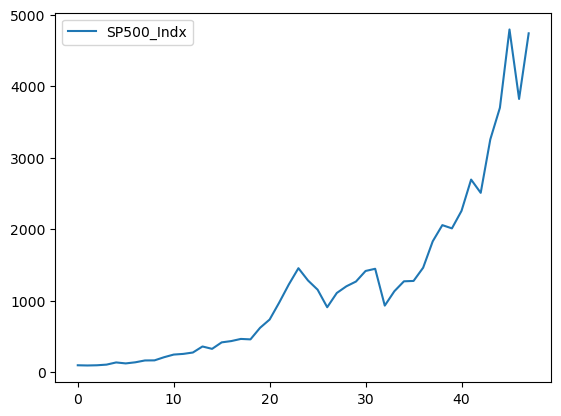

In [78]:
stock_annum_df.plot() #if this looks like the S&P, everything is correct so far

### now lets go ahead and find our rate

In [84]:
stock_annum_df['Year_Diff'] = stock_annum_df.SP500_Indx.diff()
stock_annum_df['Year_Shift'] = stock_annum_df.SP500_Indx.shift()
stock_annum_df['Year_Rate'] = stock_annum_df['Year_Diff']/stock_annum_df.Year_Shift

In [85]:
stock_annum_df

,Year,SP500_Indx,Year_Diff,Year_Shift,Year_Rate
0,1977,96.739998,NaN,NaN,NaN
1,1978,93.820000,-2.919998,96.739998,-0.030184
2,1979,96.730003,2.910004,93.820000,0.031017
3,1980,105.760002,9.029999,96.730003,0.093353
4,1981,136.339996,30.579994,105.760002,0.289145
5,1982,122.739998,-13.599998,136.339996,-0.099751
6,1983,138.339996,15.599998,122.739998,0.127098
7,1984,164.039993,25.699997,138.339996,0.185774
8,1985,165.369995,1.330002,164.039993,0.008108
9,1986,209.589996,44.220001,165.369995,0.267400


In [80]:
#stock_annum_df.to_csv("stock_annum_df.csv", index = False) 
#Save the data to a csv file for a checkpoint and to avoid having to run the code again

In [64]:
def getAnnumRate(df, rate = "Annum_Rate"):
    
    '''aggregate daily to annual rate '''
    df["Year"] = [str(i.year) for i in df.Date]
    
    annumRate = {}
    for i in df.Year.unique():
        annum_i = df[df.Year == i]
        annumRate[i] = annum_i.Close[annum_i.Date == annum_i.Date.min()].values[0] 
        
    annumRate_df = pd.DataFrame([annumRate]).T
    annumRate_df.reset_index(inplace = True)
    annumRate_df.columns = ["Year", rate]
    return annumRate_df

In [88]:
getAnnumRate(stock_indx, rate = "Annum_Rate").tail()

,Year,Annum_Rate
43,2020,3257.850098
44,2021,3700.649902
45,2022,4796.560059
46,2023,3824.139893
47,2024,4742.830078


In [89]:
stock_annum_out = stock_annum_df[["Year", "Year_Rate"]]

In [90]:
stock_annum_out

,Year,Year_Rate
0,1977,NaN
1,1978,-0.030184
2,1979,0.031017
3,1980,0.093353
4,1981,0.289145
5,1982,-0.099751
6,1983,0.127098
7,1984,0.185774
8,1985,0.008108
9,1986,0.267400


In [93]:
def getQuarterRate(df, rate = "Quarter_Rate"):
    
    '''aggregate daily to quarterly/annually rate '''
    df["Quarter"] = [str(i.year)+"-"+str(i.quarter) for i in df.Date]
    #df["Year"] = [str(i.year) for i in df.Date]
    
    quarterRate = {}
    for i in df.Quarter.unique():
        quarter_i = df[df.Quarter == i]
        quarterRate[i] = quarter_i.Close[quarter_i.Date == quarter_i.Date.min()].values[0] 
        
    quarterRate_df = pd.DataFrame([quarterRate]).T
    quarterRate_df.reset_index(inplace = True)
    quarterRate_df.columns = ["Quarter", rate]
    return quarterRate_df

In [104]:
stock_quarter = {}
for i in stock_indx.Quarter.unique():
    quarter_i = stock_indx[stock_indx.Quarter == i]
    stock_quarter[i] = quarter_i.Close[quarter_i.Date == quarter_i.Date.min()].values[0]  

In [115]:
stock_quarter_df = pd.DataFrame([stock_quarter]).T
stock_quarter_df.reset_index(inplace = True)
stock_quarter_df.columns = ["Quarter", "SP500_Idx"]

In [116]:
stock_quarter_df

,Quarter,SP500_Idx
0,1977-4,96.739998
1,1978-1,93.820000
2,1978-2,88.459999
3,1978-3,95.089996
4,1978-4,102.959999
...,...,...
181,2023-1,3824.139893
182,2023-2,4124.509766
183,2023-3,4455.589844
184,2023-4,4288.390137


In [112]:
stock_quarter_df = getQuarterRate(stock_indx, rate = "Quarter_Rate")

In [109]:
stock_indx

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter,Year
0,1977-10-03,0.000000,97.110001,95.860001,96.739998,96.739998,19460000,1977-4,1977
1,1977-10-04,0.000000,97.269997,95.730003,96.029999,96.029999,20850000,1977-4,1977
2,1977-10-05,0.000000,96.360001,95.199997,95.680000,95.680000,18300000,1977-4,1977
3,1977-10-06,0.000000,96.449997,95.300003,96.050003,96.050003,18490000,1977-4,1977
4,1977-10-07,0.000000,96.510002,95.480003,95.970001,95.970001,16250000,1977-4,1977
...,...,...,...,...,...,...,...,...,...
11687,2024-02-08,4995.160156,5000.399902,4987.089844,4997.910156,4997.910156,4341860000,2024-1,2024
11688,2024-02-09,5004.169922,5030.060059,5000.339844,5026.609863,5026.609863,3912990000,2024-1,2024
11689,2024-02-12,5026.830078,5048.390137,5016.830078,5021.839844,5021.839844,3805740000,2024-1,2024
11690,2024-02-13,4967.939941,4971.299805,4920.310059,4953.169922,4953.169922,4302190000,2024-1,2024


In [117]:
stock_quarter_df['Quarter_Diff'] = stock_quarter_df.SP500_Idx.diff()
stock_quarter_df['Quarter_Shift'] = stock_quarter_df.SP500_Idx.shift()
stock_quarter_df['Quarter_Rate'] = stock_quarter_df['Quarter_Diff']/stock_quarter_df.Quarter_Shift

In [118]:
stock_quarter_df

,Quarter,SP500_Idx,Quarter_Diff,Quarter_Shift,Quarter_Rate
0,1977-4,96.739998,NaN,NaN,NaN
1,1978-1,93.820000,-2.919998,96.739998,-0.030184
2,1978-2,88.459999,-5.360001,93.820000,-0.057131
3,1978-3,95.089996,6.629997,88.459999,0.074949
4,1978-4,102.959999,7.870003,95.089996,0.082764
...,...,...,...,...,...
181,2023-1,3824.139893,145.709961,3678.429932,0.039612
182,2023-2,4124.509766,300.369873,3824.139893,0.078546
183,2023-3,4455.589844,331.080078,4124.509766,0.080271
184,2023-4,4288.390137,-167.199707,4455.589844,-0.037526


# Inflation

In [42]:
inflscrape_df = pd.read_html(requests.get('https://www.usinflationcalculator.com/inflation/historical-inflation-rates/').content)[0]

In [43]:
inflscrape_df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
0,1914,2.0,1.0,1.0,0.0,2.1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0
1,1915,1.0,1.0,0.0,2.0,2.0,2.0,1.0,-1.0,-1.0,1.0,1.0,2.0,1.0
2,1916,3.0,4.0,6.1,6.0,5.9,6.9,6.9,7.9,9.9,10.8,11.7,12.6,7.9
3,1917,12.5,15.4,14.3,18.9,19.6,20.4,18.5,19.3,19.8,19.5,17.4,18.1,17.4
4,1918,19.7,17.5,16.7,12.7,13.3,13.1,18.0,18.5,18.0,18.5,20.7,20.4,18.0


In [44]:
inflscrape_df.tail() # this is definitely a problem

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
106,2020,2.5,2.3,1.5,0.3,0.1,0.6,1.0,1.3,1.4,1.2,1.2,1.4,1.2
107,2021,1.4,1.7,2.6,4.2,5.0,5.4,5.4,5.3,5.4,6.2,6.8,7.0,4.7
108,2022,7.5,7.9,8.5,8.3,8.6,9.1,8.5,8.3,8.2,7.7,7.1,6.5,8.0
109,2023,6.4,6.0,5.0,4.9,4.0,3.0,3.2,3.7,3.7,3.2,3.1,3.4,4.1
110,2024,3.1,Avail. March 12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
inflscrape_df.iloc[-1]

Year               2024
Jan                 3.1
Feb     Avail. March 12
Mar                 NaN
Apr                 NaN
May                 NaN
Jun                 NaN
Jul                 NaN
Aug                 NaN
Sep                 NaN
Oct                 NaN
Nov                 NaN
Dec                 NaN
Ave                 NaN
Name: 110, dtype: object

In [47]:
inflscrape_df = inflscrape_df[:-1]

In [48]:
inflscrape_df.tail() #this is better

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave
105,2019,1.6,1.5,1.9,2.0,1.8,1.6,1.8,1.7,1.7,1.8,2.1,2.3,1.8
106,2020,2.5,2.3,1.5,0.3,0.1,0.6,1.0,1.3,1.4,1.2,1.2,1.4,1.2
107,2021,1.4,1.7,2.6,4.2,5.0,5.4,5.4,5.3,5.4,6.2,6.8,7.0,4.7
108,2022,7.5,7.9,8.5,8.3,8.6,9.1,8.5,8.3,8.2,7.7,7.1,6.5,8.0
109,2023,6.4,6.0,5.0,4.9,4.0,3.0,3.2,3.7,3.7,3.2,3.1,3.4,4.1


In [53]:
inflscrape_df.Jan = inflscrape_df.Jan.astype(float)
inflscrape_df.Feb = inflscrape_df.Feb.astype(float)
inflscrape_df.Mar = inflscrape_df.Mar.astype(float)
inflscrape_df.Apr = inflscrape_df.Apr.astype(float)
inflscrape_df.May = inflscrape_df.May.astype(float)
inflscrape_df.Jun = inflscrape_df.Jun.astype(float)
inflscrape_df.Jul = inflscrape_df.Jul.astype(float)
inflscrape_df.Aug = inflscrape_df.Aug.astype(float)
inflscrape_df.Sep = inflscrape_df.Sep.astype(float)
inflscrape_df.Oct = inflscrape_df.Oct.astype(float)
inflscrape_df.Nov = inflscrape_df.Nov.astype(float)
inflscrape_df.Dec = inflscrape_df.Dec.astype(float)


In [276]:

inflscrape_df["Annual_Inf"] = inflscrape_df[['Jan','Feb','Mar', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].sum(axis = 1)

In [277]:
inflscrape_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Ave,Annum,Q1,Q2,Q3,Q4,Annual_Inf
0,1914,2.0,1.0,1.0,0.0,2.1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,14.0,1.333333,1.033333,2.000000,1.000000,14.0
1,1915,1.0,1.0,0.0,2.0,2.0,2.0,1.0,-1.0,-1.0,1.0,1.0,2.0,1.0,7.0,0.666667,2.000000,-0.333333,1.333333,7.0
2,1916,3.0,4.0,6.1,6.0,5.9,6.9,6.9,7.9,9.9,10.8,11.7,12.6,7.9,79.8,4.366667,6.266667,8.233333,11.700000,79.8
3,1917,12.5,15.4,14.3,18.9,19.6,20.4,18.5,19.3,19.8,19.5,17.4,18.1,17.4,175.2,14.066667,19.633333,19.200000,18.333333,175.2
4,1918,19.7,17.5,16.7,12.7,13.3,13.1,18.0,18.5,18.0,18.5,20.7,20.4,18.0,181.1,17.966667,13.033333,18.166667,19.866667,181.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2019,1.6,1.5,1.9,2.0,1.8,1.6,1.8,1.7,1.7,1.8,2.1,2.3,1.8,18.0,1.666667,1.800000,1.733333,2.066667,18.0
106,2020,2.5,2.3,1.5,0.3,0.1,0.6,1.0,1.3,1.4,1.2,1.2,1.4,1.2,14.4,2.100000,0.333333,1.233333,1.266667,14.4
107,2021,1.4,1.7,2.6,4.2,5.0,5.4,5.4,5.3,5.4,6.2,6.8,7.0,4.7,47.2,1.900000,4.866667,5.366667,6.666667,47.2
108,2022,7.5,7.9,8.5,8.3,8.6,9.1,8.5,8.3,8.2,7.7,7.1,6.5,8.0,79.3,7.966667,8.666667,8.333333,7.100000,79.3


In [120]:
inflscrape_df["Q1"] = inflscrape_df[['Jan','Feb','Mar']].mean(axis = 1)
inflscrape_df["Q2"] = inflscrape_df[['Apr','May','Jun']].mean(axis = 1)
inflscrape_df["Q3"] = inflscrape_df[['Jul','Aug','Sep']].mean(axis = 1)
inflscrape_df["Q4"] = inflscrape_df[['Oct','Nov','Dec']].mean(axis = 1)

In [125]:
inflation_quarter = inflscrape_df[["Year", "Q1", "Q2", "Q3", "Q4"]]

In [126]:
inflation_quarter

,Year,Q1,Q2,Q3,Q4
0,1914,1.333333,1.033333,2.000000,1.000000
1,1915,0.666667,2.000000,-0.333333,1.333333
2,1916,4.366667,6.266667,8.233333,11.700000
3,1917,14.066667,19.633333,19.200000,18.333333
4,1918,17.966667,13.033333,18.166667,19.866667
...,...,...,...,...,...
105,2019,1.666667,1.800000,1.733333,2.066667
106,2020,2.100000,0.333333,1.233333,1.266667
107,2021,1.900000,4.866667,5.366667,6.666667
108,2022,7.966667,8.666667,8.333333,7.100000


In [127]:
inflation_quarter_out = inflation_quarter.melt(id_vars="Year", value_vars=['Q1','Q2','Q3','Q4'],
         value_name='Inflation', col_level=None, ignore_index=False).reset_index(drop = True)

In [131]:
inflation_quarter_out["Quarter"]= [i[1] for i in inflation_quarter_out.variable]

In [135]:
inflation_quarter_out["Quarter"]= inflation_quarter_out.Year.astype(str) + "-" + inflation_quarter_out.Quarter

In [136]:
inflation_quarter_out

,Year,variable,Inflation,Quarter
0,1914,Q1,1.333333,1914-1
1,1915,Q1,0.666667,1915-1
2,1916,Q1,4.366667,1916-1
3,1917,Q1,14.066667,1917-1
4,1918,Q1,17.966667,1918-1
...,...,...,...,...
435,2019,Q4,2.066667,2019-4
436,2020,Q4,1.266667,2020-4
437,2021,Q4,6.666667,2021-4
438,2022,Q4,7.100000,2022-4


In [138]:
inflation_quarter_out.to_csv('inflation_data.csv', index = False)

In [279]:
inflation_annum = inflscrape_df[["Year", "Annual_Inf"]]

In [280]:
inflation_annum

,Year,Annual_Inf
0,1914,14.0
1,1915,7.0
2,1916,79.8
3,1917,175.2
4,1918,181.1
...,...,...
105,2019,18.0
106,2020,14.4
107,2021,47.2
108,2022,79.3


In [139]:
inflation_annum.to_csv('inflation_annum.csv', index = False)

## Next lets go ahead and bring in the Bond Returns, Divident and Bond-Income Rates

In [17]:
quarter_rates = pd.read_csv("../../Econ 5350/Week 4/Quarterly_Return.csv")

In [18]:
quarter_rates 

,Month_year,Dividend,Bond-Total,Bond-Income
0,3/31/1926,0.008723,0.024368,0.009221
1,6/30/1926,0.015456,0.012858,0.009135
2,9/30/1926,0.012531,0.004205,0.009296
3,12/31/1926,0.018409,0.034352,0.009143
4,3/31/1927,0.009731,0.042056,0.008612
...,...,...,...,...
384,3/31/2022,0.003618,-0.089716,0.005343
385,6/30/2022,0.003917,-0.103663,0.007727
386,9/30/2022,0.004049,-0.091893,0.008586
387,12/31/2022,0.004595,-0.002332,0.010484


In [22]:
quarter_rates['Quarter_End'] = pd.to_datetime(quarter_rates.Month_year) #Convert the month_year to datetime
quarter_rates['Quarter'] = [i.quarter for i in quarter_rates['Quarter_End']] #Get the quarter of the year
quarter_rates['Year'] = [i.year for i in quarter_rates['Quarter_End']] #Get the year

In [261]:
quarter_rates

,Month_year,Dividend,Bond_Total,Bond-Income,Quarter_End,Quarter,Year
0,3/31/1926,0.008723,0.024368,0.009221,1926-03-31,1926-1,1926
1,6/30/1926,0.015456,0.012858,0.009135,1926-06-30,1926-2,1926
2,9/30/1926,0.012531,0.004205,0.009296,1926-09-30,1926-3,1926
3,12/31/1926,0.018409,0.034352,0.009143,1926-12-31,1926-4,1926
4,3/31/1927,0.009731,0.042056,0.008612,1927-03-31,1927-1,1927
...,...,...,...,...,...,...,...
384,3/31/2022,0.003618,-0.089716,0.005343,2022-03-31,2022-1,2022
385,6/30/2022,0.003917,-0.103663,0.007727,2022-06-30,2022-2,2022
386,9/30/2022,0.004049,-0.091893,0.008586,2022-09-30,2022-3,2022
387,12/31/2022,0.004595,-0.002332,0.010484,2022-12-31,2022-4,2022


In [262]:
quarter_rates = quarter_rates.rename(columns={'Bond-Total': 'Bond_Total'})
quarter_rates = quarter_rates.rename(columns={'Bond-Income': 'Bond_Income'})

In [246]:
ew_df = pd.DataFrame({'Year':inflation_annum.Year})

In [250]:
ew_d = quarter_rates.Dividend.groupby([[i//4 for i in range(0,389)]], axis = 0).sum()

In [263]:
ew_bt = quarter_rates.Bond_Total.groupby([[i//4 for i in range(0,389)]], axis = 0).sum()

In [265]:
ew_bi = quarter_rates.Bond_Income.groupby([[i//4 for i in range(0,389)]], axis = 0).sum()

In [197]:
type(ew_df)

pandas.core.series.Series

In [ ]:
ew_df = ew_df.drop(ew_df.index[0:12], inplace = False).reset_index(drop = True)

In [255]:
ew_df['Dividend'] = ew_d.values

In [266]:
ew_df['Bond_Total'] = ew_bt.values
ew_df['Bond_Income'] = ew_bi.values

In [195]:
ew_df.reset_index

<bound method Series.reset_index of 0     0.055119
1     0.051054
2     0.042572
3     0.037644
4     0.047970
        ...   
93    0.020418
94    0.018505
95    0.014478
96    0.016179
97    0.004462
Name: Dividend, Length: 98, dtype: float64>

In [267]:
ew_df

,Year,Dividend,Bond_Total,Bond_Income
0,1926,0.055119,0.075783,0.036794
1,1927,0.051054,0.086842,0.033260
2,1928,0.042572,0.001376,0.032835
3,1929,0.037644,0.036013,0.035813
4,1930,0.047970,0.045875,0.032983
...,...,...,...,...
93,2019,0.020418,0.119376,0.023997
94,2020,0.018505,0.171385,0.013495
95,2021,0.014478,-0.046870,0.018765
96,2022,0.016179,-0.287605,0.032140


In [274]:
divnbonds_annum = ew_df

In [285]:
divnbonds_annum

,Year,Dividend,Bond_Total,Bond_Income
0,1926,0.055119,0.075783,0.036794
1,1927,0.051054,0.086842,0.033260
2,1928,0.042572,0.001376,0.032835
3,1929,0.037644,0.036013,0.035813
4,1930,0.047970,0.045875,0.032983
...,...,...,...,...
93,2019,0.020418,0.119376,0.023997
94,2020,0.018505,0.171385,0.013495
95,2021,0.014478,-0.046870,0.018765
96,2022,0.016179,-0.287605,0.032140


Now lets merge all of our data into one single dataframe

In [33]:
print(type(quarter_rates['Quarter'][0]), type(quarter_rates['Year'][0]))

<class 'numpy.int64'> <class 'numpy.int64'>


In [141]:
#create a merg key
quarter_rates['Quarter'] = quarter_rates.Year.astype(str) + "-" + quarter_rates.Quarter.astype(str)

In [288]:
divnbonds_annum['Year'] = divnbonds_annum.Year.astype(str)
stock_annum_out['Year'] = stock_annum_out.Year.astype(str)
inflation_annum['Year'] = inflation_annum.Year.astype(str)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_8832\532814362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_annum_out['Year'] = stock_annum_out.Year.astype(str)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_8832\532814362.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation_annum['Year'] = inflation_annum.Year.astype(str)


In [281]:
stock_quarter_df.columns, inflscrape_df.columns, quarter_rates.columns

(Index(['Quarter', 'SP500_Idx', 'Quarter_Diff', 'Quarter_Shift',
        'Quarter_Rate'],
       dtype='object'),
 Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
        'Oct', 'Nov', 'Dec', 'Ave', 'Annum', 'Q1', 'Q2', 'Q3', 'Q4',
        'Annual_Inf'],
       dtype='object'),
 Index(['Month_year', 'Dividend', 'Bond_Total', 'Bond_Income', 'Quarter_End',
        'Quarter', 'Year'],
       dtype='object'))

In [273]:
stock_annum_out.columns, inflation_annum.columns, divnbonds_anum.columns

(Index(['Year', 'Year_Rate'], dtype='object'),
 Index(['Year', 'Annum'], dtype='object'),
 Index(['Year', 'Dividend', 'Bond_Total', 'Bond_Income'], dtype='object'))

In [292]:
year_all = pd.merge(pd.merge(stock_annum_out[['Year', 'Year_Rate']], inflation_annum[['Year', 'Annual_Inf']], on = "Year"),
                 dividend_annum[['Dividend','Bond_Total','Bond_Income', 'Year']], on = "Year") 

In [295]:
year_all

,Year,Year_Rate,Annual_Inf,Dividend,Bond_Total,Bond_Income
1,1978,-0.030184,77.8,0.053484,-0.011295,0.083212
2,1979,0.031017,113.5,0.055479,-0.009620,0.091359
3,1980,0.093353,133.8,0.053462,0.004019,0.110749
4,1981,0.289145,104.5,0.051772,0.032471,0.128376
5,1982,-0.099751,60.7,0.058498,0.362651,0.128476
6,1983,0.127098,31.4,0.044953,0.006524,0.110362
7,1984,0.185774,42.9,0.047268,0.156438,0.123117
8,1985,0.008108,35.0,0.042849,0.286075,0.108541
9,1986,0.267400,20.0,0.035248,0.238139,0.081438
10,1987,0.175867,36.3,0.031269,-0.020360,0.085639


In [298]:
year_all.to_csv('year_all.csv', index = False)

In [294]:
year_all.dropna(inplace = True)

In [146]:
quarter_all = pd.merge(pd.merge(stock_quarter_df[['Quarter', 'Quarter_Rate']], inflation_quarter_out[['Inflation', 'Quarter']], on = "Quarter"),
                 quarter_rates[['Dividend','Bond-Total','Bond_Income','Quarter']], on = "Quarter")

In [300]:
quarter_all

,Quarter,Quarter_Rate,Inflation,Dividend,Bond-Total,Bond-Income
1,1978-1,-0.030184,6.600000,0.013120,-0.009678,0.019950
2,1978-2,-0.057131,6.966667,0.013639,-0.012488,0.020906
3,1978-3,0.074949,7.933333,0.012688,0.025397,0.020960
4,1978-4,0.082764,8.933333,0.014036,-0.014526,0.021397
5,1979-1,-0.060509,9.766667,0.013508,0.018392,0.021984
...,...,...,...,...,...,...
177,2022-1,0.100876,7.966667,0.003618,-0.089716,0.005343
178,2022-2,-0.052267,8.666667,0.003917,-0.103663,0.007727
179,2022-3,-0.158502,8.333333,0.004049,-0.091893,0.008586
180,2022-4,-0.038402,7.100000,0.004595,-0.002332,0.010484


In [148]:
quarter_all.dropna(inplace = True)

In [299]:
quarter_all.to_csv('quarter_all.csv', index = False)